In [1]:
import os
os.nice(10)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np
from transformers import BertTokenizer
from transformers import BertForSequenceClassification
from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import f1_score
import pickle
from collections import Counter
import seaborn as sns
from transformers import logging
logging.set_verbosity_error()
import csv

2022-01-17 12:12:26.745106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-17 12:12:26.745140: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In this file I plot multilingual performances on validation (full code)
and multilingual evaluation on test set (the full code is on multilingual_eval.py)
- Instead file multilingual_evaluation.ipynb is useless (it contains old multilingual evaluation and the first part of global explanation with IG word attributions and the cleaning attempt)

# Multilingual Models Evaluation on Validation


## Multilingual BERT 6 class Without punctuation

In [2]:
mbert_nopunt = pd.read_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/MultiBert_6class_all/no_punt/MBERT_training_stats.csv')
mbert_nopunt.index = np.arange(1, len(mbert_nopunt) + 1)
mbert_nopunt

,epoch,Training Loss,Valid. Loss,Valid. F1 Score
1,1,0.640514,0.596939,0.870432
2,2,0.494985,0.527903,0.891722
3,3,0.397576,0.535465,0.899567


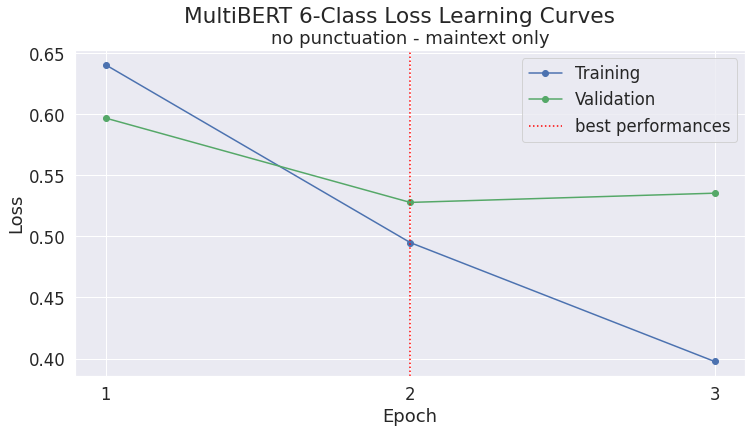

In [3]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(mbert_nopunt['Training Loss'], 'b-o', label="Training")
plt.plot(mbert_nopunt['Valid. Loss'], 'g-o', label="Validation")
plt.title("no punctuation - maintext only")
plt.suptitle('MultiBERT 6-Class Loss Learning Curves')
plt.axvline(2, 0, 1, color = 'red', label='best performances', linestyle = 'dotted')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])
plt.show()

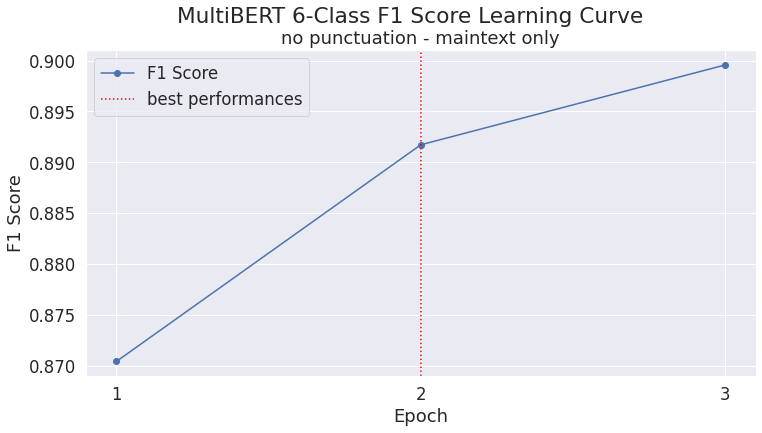

In [4]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(mbert_nopunt['Valid. F1 Score'], 'b-o', label='F1 Score')
plt.axvline(2, 0, 1, color = 'red', label='best performances', linestyle = 'dotted')
plt.title("no punctuation - maintext only")
plt.suptitle('MultiBERT 6-Class F1 Score Learning Curve')
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.xticks([1, 2, 3])
plt.legend()
plt.show()

## Multilingual BERT 6 class with punctuation 

In [5]:
mbert_punt = pd.read_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/MultiBert_6class_all/punt/MBERT_training_stats.csv')
mbert_punt.index = np.arange(1, len(mbert_punt) + 1)
mbert_punt

,epoch,Training Loss,Valid. Loss,Valid. F1 Score
1,1,0.525515,0.420189,0.909812
2,2,0.379579,0.380317,0.923812
3,3,0.293058,0.373375,0.930867


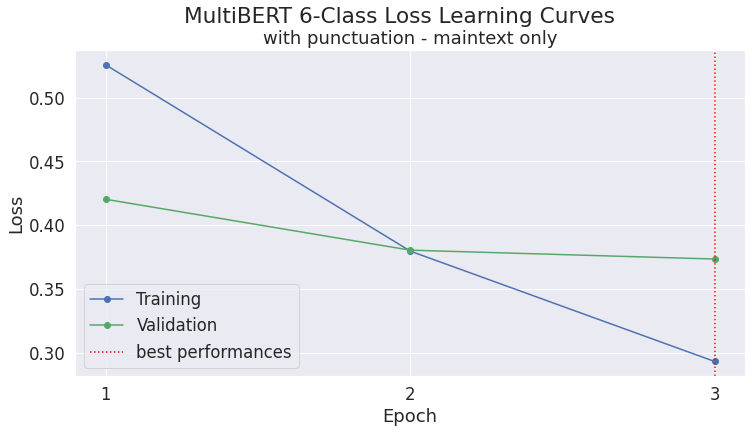

In [6]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(mbert_punt['Training Loss'], 'b-o', label="Training")
plt.plot(mbert_punt['Valid. Loss'], 'g-o', label="Validation")
plt.title("with punctuation - maintext only")
plt.suptitle('MultiBERT 6-Class Loss Learning Curves')
plt.axvline(3, 0, 1, color = 'red', label='best performances', linestyle = 'dotted')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])
plt.show()

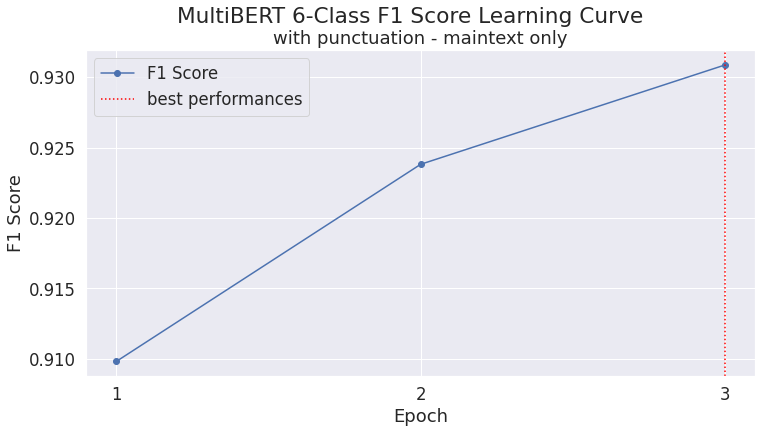

In [7]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(mbert_punt['Valid. F1 Score'], 'b-o', label='F1 Score')
plt.axvline(3, 0, 1, color = 'red', label='best performances', linestyle = 'dotted')
plt.title("with punctuation - maintext only")
plt.suptitle('MultiBERT 6-Class F1 Score Learning Curve')
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.xticks([1, 2, 3])
plt.legend()
plt.show()

## XLM 6 class With punctuation 

In [8]:
xlm_punt = pd.read_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/XLM/punt/XLM_training_stats.csv')
xlm_punt.index = np.arange(1, len(xlm_punt) + 1)
xlm_punt

,epoch,Training Loss,Valid. Loss,Valid. F1 Score
1,1,0.511657,0.433263,0.914196
2,2,0.359533,0.377647,0.928672
3,3,0.280842,0.363482,0.936089


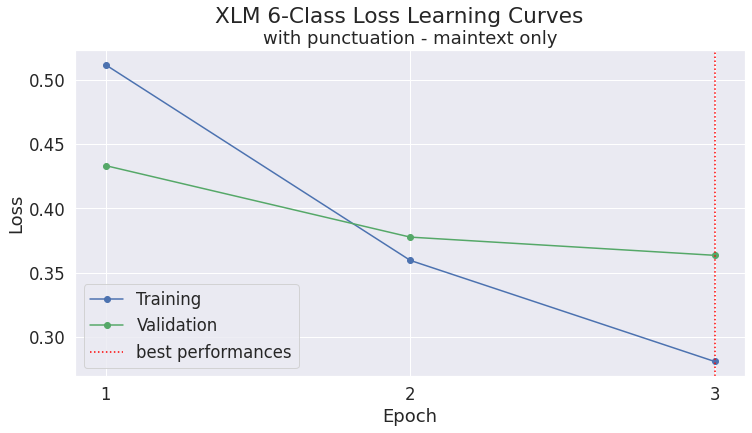

In [9]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(xlm_punt['Training Loss'], 'b-o', label="Training")
plt.plot(xlm_punt['Valid. Loss'], 'g-o', label="Validation")
plt.title("with punctuation - maintext only")
plt.suptitle('XLM 6-Class Loss Learning Curves')
plt.axvline(3, 0, 1, color = 'red', label='best performances', linestyle = 'dotted')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])
plt.show()

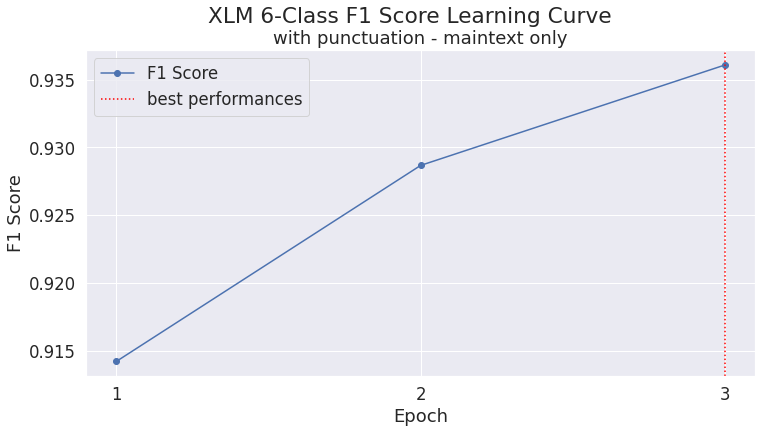

In [10]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(xlm_punt['Valid. F1 Score'], 'b-o', label='F1 Score')
plt.axvline(3, 0, 1, color = 'red', label='best performances', linestyle = 'dotted')
plt.title("with punctuation - maintext only")
plt.suptitle('XLM 6-Class F1 Score Learning Curve')
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.xticks([1, 2, 3])
plt.legend()
plt.show()

## XLM 6 class Without punctuation 

In [11]:
xlm_nopunt = pd.read_csv('/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/XLM/no_punt/XLM_training_stats.csv')
xlm_nopunt.index = np.arange(1, len(xlm_nopunt) + 1)
xlm_nopunt

,epoch,Training Loss,Valid. Loss,Valid. F1 Score
1,1,0.643730,0.615219,0.870069
2,2,0.491693,0.516906,0.893972
3,3,0.405023,0.507172,0.904025


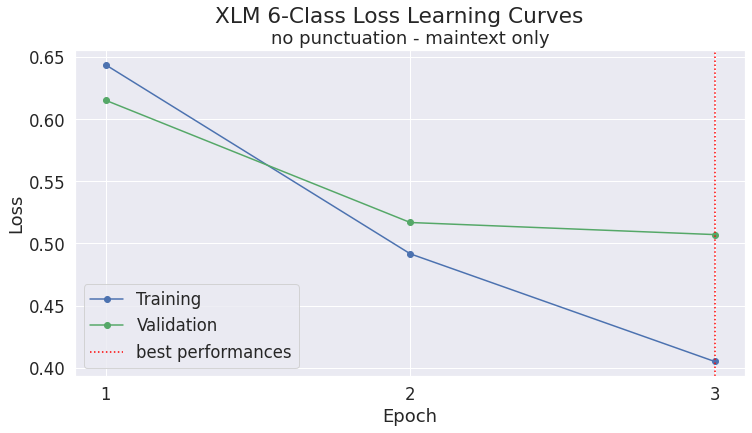

In [12]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(xlm_nopunt['Training Loss'], 'b-o', label="Training")
plt.plot(xlm_nopunt['Valid. Loss'], 'g-o', label="Validation")
plt.title("no punctuation - maintext only")
plt.suptitle('XLM 6-Class Loss Learning Curves')
plt.axvline(3, 0, 1, color = 'red', label='best performances', linestyle = 'dotted')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])
plt.show()

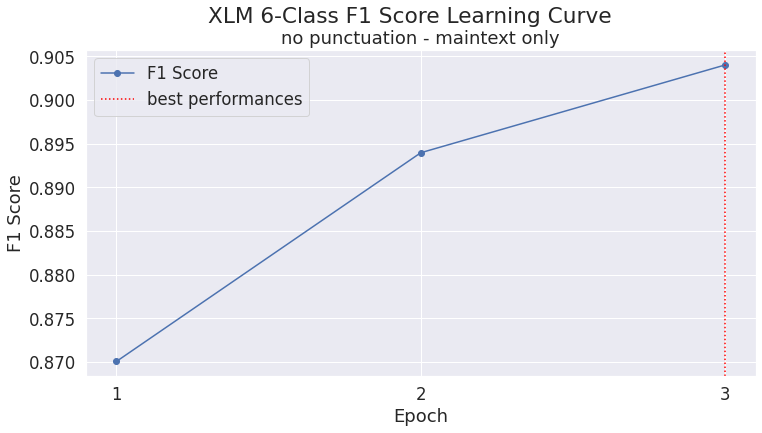

In [13]:
sns.set(style='darkgrid')
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
plt.plot(xlm_nopunt['Valid. F1 Score'], 'b-o', label='F1 Score')
plt.axvline(3, 0, 1, color = 'red', label='best performances', linestyle = 'dotted')
plt.title("no punctuation - maintext only")
plt.suptitle('XLM 6-Class F1 Score Learning Curve')
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.xticks([1, 2, 3])
plt.legend()
plt.show()

## Models comparison F1 Score 

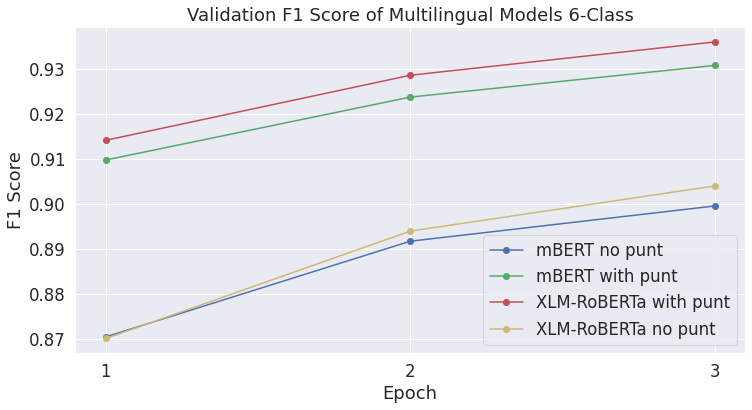

In [14]:
epochs = range(1,11)
plt.plot(mbert_nopunt['Valid. F1 Score'][:5], 'b-o', label='mBERT no punt')
plt.plot(mbert_punt['Valid. F1 Score'], 'g-o', label='mBERT with punt')
plt.plot(xlm_punt['Valid. F1 Score'], 'r-o', label='XLM-RoBERTa with punt')
plt.plot(xlm_nopunt['Valid. F1 Score'], 'y-o', label='XLM-RoBERTa no punt')

# Label the plot.
plt.title("Validation F1 Score of Multilingual Models 6-Class")
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.xticks([1, 2, 3])
#plt.axvline(3, 0, 1, color = 'red', label='best performances', linestyle = 'dotted')
plt.legend()
# saving plot
#plt.savefig('Graphs/models_comparisonF1score.png')
plt.show()

# Multilingual Models Evaluation on Test Set


## Test Set predictions

In [2]:
'''
Compute Performances Metrics
'''
def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')
def accuracy_per_class(preds, labels, label_dict):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    #preds_flat = np.argmax(preds, axis=1).flatten()
    preds_flat = np.argmax(preds, axis=1)
    labels_flat = labels
    correct_idx = (preds_flat == labels_flat)

    for label in np.unique(labels_flat):
        #y_preds = preds_flat[labels_flat==label]
        #y_true = labels_flat[labels_flat==label]
        n_correct = np.sum(labels_flat[correct_idx] == label)
        n_label = np.sum(labels_flat == label)
        
        print(f'Class: {label} {label_dict_inverse[label]}, ')
        print(f'{n_correct}/{len(labels_flat[labels_flat==label])}', n_correct/len(labels_flat[labels_flat==label]) )
        #print((f'{len(y_preds[y_preds==label])}/{len(y_true)}', len(y_preds[y_preds==label])/len(y_true) ))
        #print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')
        #print('Accuracy %:',len(y_preds[y_preds==label])/len(y_true))

In [3]:

'''
Making Predictions on unseen data

def evaluate(dataloader_val, model, device):

    model.eval()
    
    predictions, true_vals = [], []
    input_ids = []
    #attention = [] TODO: rimetti quando vuoi calcolare attention
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        logits = outputs[1] 
        _attention = outputs[2] 
        _input_ids = inputs['input_ids']

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
        input_ids.append(_input_ids.cpu().numpy()) # we are extracting token ids to explain the model via attention
        #_attention = [a.cpu().numpy() for a in _attention] TODO: rimetti quando vuoi calcolare attention
        #attention.append(_attention) # we are calculating attention to explain the model TODO: rimetti quando vuoi calcolare attention
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
    int_pred = np.argmax(predictions, axis=1)
    rows = zip(int_pred,true_vals)
    
    # return  predictions, true_vals, rows, input_ids, attention TODO: rimetti quando vuoi calcolare attention
    return  predictions, true_vals, rows, input_ids
    '''
def evaluate(dataloader_val, model, device):

    model.eval()
    
    predictions, true_vals = [], []
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                'attention_mask': batch[1],
                'labels':         batch[2],
                }

        with torch.no_grad():        
            outputs = model(**inputs)

        logits = outputs[1]

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
    int_pred = np.argmax(predictions, axis=1)
    rows = zip(int_pred,true_vals)
    
    return  predictions, true_vals, rows

In [4]:
def TestSet_Evaluation(df, model_path, _type, model_type, biased):
    # setting device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    #device ='cpu'
    print('Device',device)
    '''
    Data Preparation
    '''
    # dropping unecessary columns for classification
    #df.drop(columns=['title','date_publish','language','source_domain','id','country','source_name', 'year'], inplace=True) # TODO: prova mergendo maintext con title e solo title
    df.drop(columns=['title','date_publish','language','source_domain','source_name', 'year'], inplace=True) # TODO: prova mergendo maintext con title e solo title
    print('n_articles for each label:', df['political_leaning'].value_counts())
    #print(df.groupby(['label', 'data_type']).count())
    # label dict 
    #label_dict = pd.Series(df.label.values,index=df.political_leaning).to_dict()
    label_dict = {'Left-wing': 4, 'Conservative': 0, 'Liberal-conservative': 3, 'Right-wing': 5, 'Liberal': 1, 'Centre-left': 2}
    print(label_dict)
    
    # BertTokenizer: tokenizing texts and turning them into integers vectors
    if model_type == 'MultiBert_6class_all':
        tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', 
                                          do_lower_case=False)
    elif model_type == 'XLM':
        tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base', 
                                          do_lower_case=False) # TODO: prova anche con True
    # encoding tokenized texts to indexes
    encoded_data_val = tokenizer.batch_encode_plus(
    df.maintext.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    padding=True, 
    truncation=True, 
    return_tensors='pt'
    )
    input_ids_val = encoded_data_val['input_ids']
    attention_masks_val = encoded_data_val['attention_mask']
    labels_val = torch.tensor(df.label.values)
    dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)
    batch_size = 2
    # iterable DatLoader
    dataloader_testset = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size, 
                                   num_workers=6)
    '''
    Loading and Evaluating Model
    '''
    if model_type == 'MultiBert_6class_all':
        model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False, #TODO: rimetti True quando vuoi calcolare attention
                                                      output_hidden_states=False)
    elif model_type == 'XLM':
        model = XLMRobertaForSequenceClassification.from_pretrained('xlm-roberta-base',
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,  #TODO: rimetti True quando vuoi calcolare attention
                                                      output_hidden_states=False)                                           
    model.to(device)
    #model.load_state_dict(torch.load(model_path))

    model.load_state_dict(torch.load(model_path, map_location=torch.device(device)))
    #predictions, true_vals, rows, input_ids, attention = evaluate(dataloader_testset, model, device)  #TODO: rimetti  quando vuoi calcolare attention
    #predictions, true_vals, rows, input_ids = evaluate(dataloader_testset, model, device)
    predictions, true_vals, rows = evaluate(dataloader_testset, model, device)
    #batch_sents = np.concatenate(input_ids, axis=0)  #TODO: rimetti  quando vuoi calcolare attention
    #converted = [tokenizer.convert_ids_to_tokens(sent) for sent in batch_sents] #TODO: rimetti  quando vuoi calcolare attention
    # return converted, attention (to extract attention and converted ids to token)
    
    if biased == False:
        with open(f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/{model_type}/{_type}/testset_pred/true_pred_class_6class_nobias', "w") as f: # csv file with predictions (pred_class, true_class)
            writer = csv.writer(f)
            for row in rows:
                writer.writerow(row)
    else:
        with open(f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/{model_type}/{_type}/testset_pred/true_pred_class_6class_bias', "w") as f: # csv file with predictions (pred_class, true_class)
            writer = csv.writer(f)
            for row in rows:
                writer.writerow(row)
   

    # Computing Test Set performances
    print('\n')
    val_f1 = f1_score_func(predictions, true_vals)
    print(f'F1 Score (Weighted): {round(val_f1,3)}')
    print('\n')
    print('Accuracy:')
    val_accuracy = accuracy_per_class(predictions, true_vals, label_dict)

In [5]:
def Plot_ConfusionMatrix(true, pred):
  n_rows, n_cols = 1, 1
  f, ax= plt.subplots(n_rows, n_cols, figsize=(8,5))
  sns.heatmap(confusion_matrix(true, pred), annot=True, fmt='g', ax=ax)  #annot=True to annotate cells, ftm='g' to disable scientific notation

  # set labels
  true = set(true)
  label_dict = {4: 'Left-wing', 0: 'Conservative', 3: 'Liberal-conservative', 5: 'Right-wing', 1: 'Liberal', 2: 'Centre-left'}
  label = [label_dict[elem] for elem in true]
  
  # labels, title and ticks
  ax.set_xlabel('True labels', fontsize=20)
  ax.set_ylabel('Predicted labels', fontsize=20)
  ax.xaxis.set_ticklabels(label, rotation=90)
  ax.yaxis.set_ticklabels(label, rotation=0)
  plt.show()

## Multilingual BERT 6 class no punctuation 
TODO


### Test Bias

Number of test sentences: 45,000

Device cpu
n_articles for each label: Centre-left             7500
Conservative            7500
Left-wing               7500
Liberal                 7500
Liberal-conservative    7500
Right-wing              7500
Name: political_leaning, dtype: int64
{'Left-wing': 4, 'Conservative': 0, 'Liberal-conservative': 3, 'Right-wing': 5, 'Liberal': 1, 'Centre-left': 2}


F1 Score (Weighted): 0.891


Accuracy:
Class: 0 Conservative, 
6678/7500 0.8904
Class: 1 Liberal, 
6293/7500 0.8390666666666666
Class: 2 Centre-left, 
6101/7500 0.8134666666666667
Class: 3 Liberal-conservative, 
6747/7500 0.8996
Class: 4 Left-wing, 
6939/7500 0.9252
Class: 5 Right-wing, 
7367/7500 0.9822666666666666


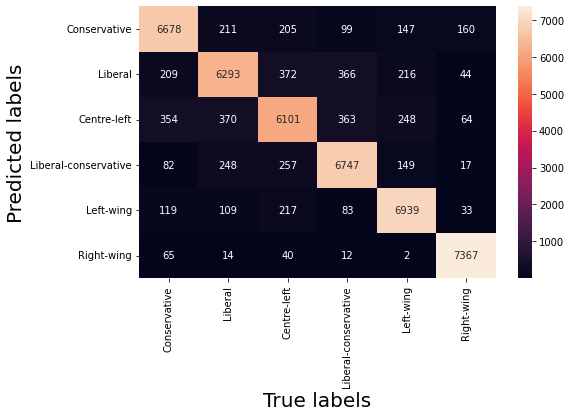

In [7]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/test_bias_cleaned_nopunt.csv")
df = df.groupby('political_leaning').apply(lambda x: x.sample(n=7500))
assigned_labels = {'Liberal': 1, 'Conservative': 0, 'Centre-left': 2, 'Left-wing': 4, 'Liberal-conservative': 3, 'Right-wing': 5}
df['label'] = df['political_leaning'].map(assigned_labels)
_type = 'no_punt'
model_type = 'MultiBert_6class_all'
model_path = f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/MultiBert_6class_all/no_punt/finetuned_MBERT6class_epoch_2_new.model'
biased = True
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))
#input_ids, attention = TestSet_Evaluation(df, model_path, _type, model_type, biased) to extract attention and converted ids to token
TestSet_Evaluation(df, model_path, _type, model_type, biased)

pred_true_vals = pd.read_csv(f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/{model_type}/{_type}/testset_pred/true_pred_class_6class_bias', names=['pred_class','true_class'])
pred = pred_true_vals['pred_class'].to_list()
true = pred_true_vals['true_class'].to_list()
df['pred_class'] = pred
df['true_class'] = true
df.head()
Plot_ConfusionMatrix(true, pred)

### Test no Bias

In [6]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/test_no_bias_balanced_cleaned_nopunt.csv")
assigned_labels = {'Liberal': 1, 'Conservative': 0, 'Centre-left': 2, 'Left-wing': 4, 'Liberal-conservative': 3, 'Right-wing': 5}
df['label'] = df['political_leaning'].map(assigned_labels)
biased = False
model_type = 'MultiBert_6class_all'
_type = 'no_punt'
model_path = f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/MultiBert_6class_all/no_punt/finetuned_MBERT6class_epoch_2_new.model'
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))
TestSet_Evaluation(df, model_path, _type, model_type, biased)
pred_true_vals = pd.read_csv(f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/{model_type}/{_type}/testset_pred/true_pred_class_6class_nobias', names=['pred_class','true_class'])
pred = pred_true_vals['pred_class'].to_list()
true = pred_true_vals['true_class'].to_list()
df['pred_class'] = pred
df['true_class'] = true
df.head()
Plot_ConfusionMatrix(true, pred)

Number of test sentences: 39,000

Device cpu
n_articles for each label: Liberal                 7500
Centre-left             7500
Liberal-conservative    7500
Conservative            7500
Right-wing              4500
Left-wing               4500
Name: political_leaning, dtype: int64
{'Left-wing': 4, 'Conservative': 0, 'Liberal-conservative': 3, 'Right-wing': 5, 'Liberal': 1, 'Centre-left': 2}


RuntimeError: Too many open files. Communication with the workers is no longer possible. Please increase the limit using `ulimit -n` in the shell or change the sharing strategy by calling `torch.multiprocessing.set_sharing_strategy('file_system')` at the beginning of your code

## Multilingual BERT 6 class With punctuation 
TODO

### Test Bias

In [ ]:
# Load the dataset into a pandas dataframe.
df = pd.read_csv("/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/test_bias_cleaned.csv")
df = df.groupby('political_leaning').apply(lambda x: x.sample(n=10))
assigned_labels = {'Liberal': 1, 'Conservative': 0, 'Centre-left': 2, 'Left-wing': 4, 'Liberal-conservative': 3, 'Right-wing': 5}
df['label'] = df['political_leaning'].map(assigned_labels)
_type = 'punt'
model_type = 'MultiBert_6class_all'
model_path = f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/MultiBert_6class_all/punt/finetuned_MBERT6class_epoch_3_new.model'
biased = True
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))
#input_ids, attention = TestSet_Evaluation(df, model_path, _type, model_type, biased) to extract attention and converted ids to token
TestSet_Evaluation(df, model_path, _type, model_type, biased)

pred_true_vals = pd.read_csv(f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/{model_type}/{_type}/testset_pred/true_pred_class_6class_bias', names=['pred_class','true_class'])
pred = pred_true_vals['pred_class'].to_list()
true = pred_true_vals['true_class'].to_list()
df['pred_class'] = pred
df['true_class'] = true
df.head()
Plot_ConfusionMatrix(true, pred)

### Test no bias DONE

In [ ]:

# Load the dataset into a pandas dataframe.
df = pd.read_csv("/homenfs/l.bellomo1/datasets/new_attempt_classifier/datasets/test_no_bias_balanced_cleaned.csv")
df = df.groupby('political_leaning').apply(lambda x: x.sample(n=10))
assigned_labels = {'Liberal': 1, 'Conservative': 0, 'Centre-left': 2, 'Left-wing': 4, 'Liberal-conservative': 3, 'Right-wing': 5}
df['label'] = df['political_leaning'].map(assigned_labels)
biased = False
model_type = 'MultiBert_6class_all'
_type = 'punt'
model_path = f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/MultiBert_6class_all/punt/finetuned_MBERT6class_epoch_3_new.model'
# Report the number of sentences.
print('Number of test sentences: {:,}\n'.format(df.shape[0]))
TestSet_Evaluation(df, model_path, _type, model_type, biased)
pred_true_vals = pd.read_csv(f'/homenfs/l.bellomo1/datasets/new_attempt_classifier/explainability/models/{model_type}/{_type}/testset_pred/true_pred_class_6class_nobias', names=['pred_class','true_class'])
pred = pred_true_vals['pred_class'].to_list()
true = pred_true_vals['true_class'].to_list()
df['pred_class'] = pred
df['true_class'] = true
df.head()
Plot_ConfusionMatrix(true, pred)

In [ ]:
# TODO AGGIUNGI XLM PUNT E NO PUNT